In [4]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline

In [2]:
read = pd.read_csv("/home/vikas/Downloads/data/tita_train.csv")
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Values

In [5]:
read1 = read.fillna(0)
read1.head()
read11 = read1.copy()
read11

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [6]:
read1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


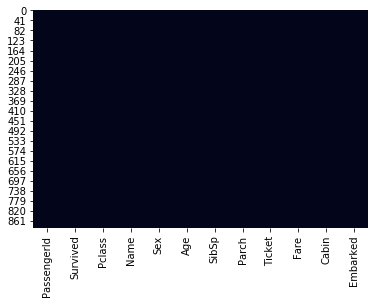

In [9]:
sb.heatmap(read1.isnull(), cbar=False)

# 1.In this dataset i want to check the respective person is survive or not

In [29]:
x= read1.drop(['Survived','Cabin','Embarked','Name'],axis = 1)
y= read1.loc[:,'Survived']
#x.head()


In [ ]:
# import seaborn as sns; sns.set()
# from sklearn.datasets.samples_generator import make_circles

# #x, y = make_circles(100, factor=.1, noise=.1)
# plt.scatter(x,y, s=50, cmap='spring')
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# read1['Name'] = label_encoder.fit_transform(read1['Name'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit_transform(x)
cols = x.columns
X_enc = x.copy()
for col in cols:
    lb = LabelEncoder() # Shift + Tab
    X_enc[col] = le.fit_transform(x[col])
X_enc.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,2,1,29,1,0,523,18
1,1,0,0,52,1,0,596,207
2,2,2,0,35,0,0,669,41
3,3,0,0,48,1,0,49,189
4,4,2,1,48,0,0,472,43


In [33]:
# from sklearn import preprocessing
# le = LabelEncoder()
# y['Survived'] = le.fit_transform(y['Survived'])


# Visualization

In [32]:
## Helper function to help you visualize your decision boundaries

def plot_classifier(model, features, labels):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    h = .02  # step size in the mesh
    x1 = features.values[:, :2] # converting dataframe into numpy array
    y = labels.values
    
    map_dict = {'PassengerId':0, 'Pclass':1, 'Sex':2}
    y = np.array(list(map(lambda a: map_dict[a],list(y))))

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    model.fit(x,y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("{} classification".format(model))
    
#plot_classifier(KNeighborsClassifier(5), X, y)



In [ ]:
plot_classifier(KNeighborsClassifier(8),x,y)

In [ ]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# read1['Name'] = label_encode.fit_transform(read1['Name'])
# read1.head()

In [ ]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# read1['Sex'] = label_encode.fit_transform(read1['Sex'])
# read1.head()

In [ ]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# read1['Ticket'] = label_encode.fit_transform(read1['Ticket'])
# read1.head()
# model = SVC(kernel='linear', C=1E10)
# model.fit(x, y)
# model

In [ ]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# read1['Cabin'] = label_encoder.fit_transform(read1['Cabin'])
# read1

In [ ]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# read1['Embarked'] = label_encoder.fit_transform(read1['Embarked'])
# read1

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_enc,y)
svc = SVC()
svc.fit(x_train,y_train)
#svc.predict(x_test)
svc.score(x_test,y_test)

# increase accuracy

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

In [ ]:
 sb.jointplot(x='',y='Survived',data=tips,kind='scatter')